In [16]:
import soundfile as sf

# Load the audio file
data, samplerate = sf.read('Bat.ogg')

# Print the shape of the array
print("Shape of the audio array:", data.shape)

# Select only one channel (the first channel in this example)
mono_data = data[:, 0] if data.ndim > 1 else data

# Print the shape of the mono audio array
print("Shape of the mono audio array:", mono_data.shape)


Shape of the audio array: (7872, 2)
Shape of the mono audio array: (7872,)


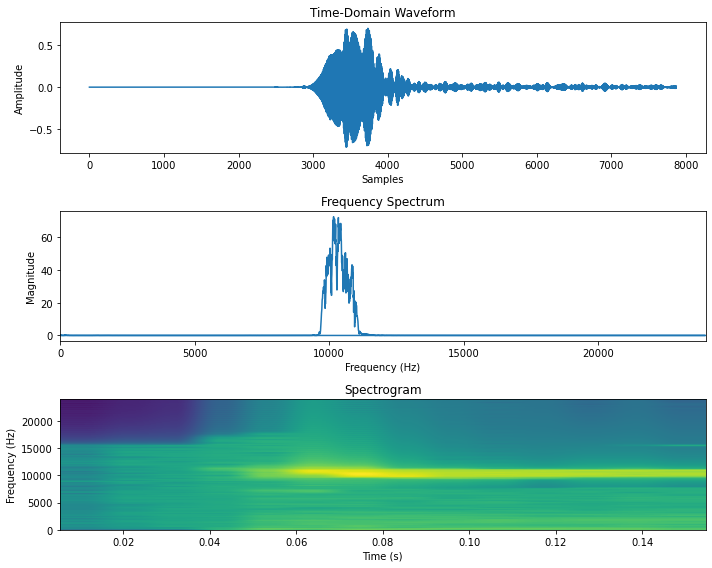

In [17]:
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
data, samplerate = sf.read('Bat.ogg')

# Play the audio (using the first channel in case of stereo)
Audio(data[:, 0] if data.ndim > 1 else data, rate=samplerate)

# Select only one channel for analysis
mono_data = data[:, 0] if data.ndim > 1 else data

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Time-domain waveform
axs[0].plot(mono_data)
axs[0].set_title('Time-Domain Waveform')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

# Frequency spectrum
fft_result = np.fft.fft(mono_data)
fft_freqs = np.fft.fftfreq(len(fft_result), 1 / samplerate)
axs[1].plot(fft_freqs, np.abs(fft_result))
axs[1].set_xlim([0, samplerate / 2])  # Limit to positive frequencies
axs[1].set_title('Frequency Spectrum')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')

# Spectrogram
Pxx, freqs, bins, im = axs[2].specgram(mono_data, NFFT=1024, Fs=samplerate, noverlap=512)
axs[2].set_title('Spectrogram')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


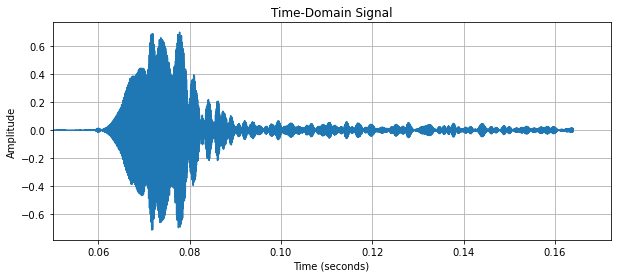

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the time for each sample
num_samples = len(mono_data)
time_array = np.arange(num_samples) / samplerate

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(time_array, mono_data)
plt.xlim(0.05)
plt.title('Time-Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


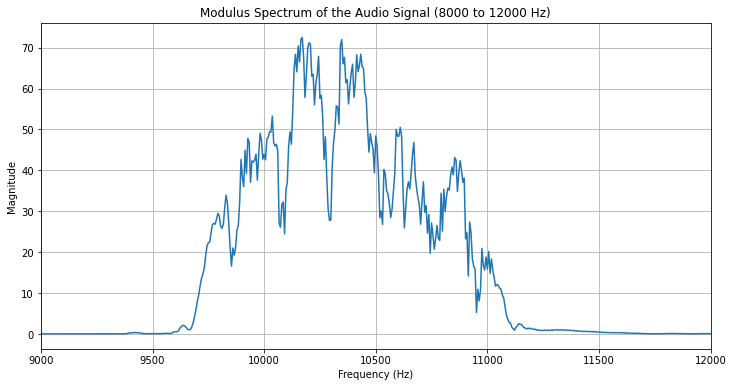

In [19]:
# Load the audio file and convert it to mono if it's stereo
data, samplerate = sf.read('Bat.ogg')
mono_data = data[:, 0] if data.ndim > 1 else data

# Compute the Fourier Transform
fft_result = np.fft.fft(mono_data)
fft_freqs = np.fft.fftfreq(len(fft_result), 1/samplerate)

# Compute the modulus (absolute value) of the Fourier Transform
fft_magnitude = np.abs(fft_result)

# Plot the modulus spectrum for the specific frequency range
plt.figure(figsize=(12, 6))
plt.plot(fft_freqs[:len(fft_result)//2], fft_magnitude[:len(fft_result)//2]) # Plot only the positive frequencies
plt.xlim(9000, 12000) # Limit the x-axis to the range 8000 to 12000 Hz
plt.title("Modulus Spectrum of the Audio Signal (8000 to 12000 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [20]:
lower_bound = 9500
upper_bound = 11500
filtered_indices = np.where((fft_freqs >= lower_bound) & (fft_freqs <= upper_bound))

# Extract the relevant frequency and magnitude data
filtered_freqs = fft_freqs[filtered_indices]
filtered_magnitude = np.abs(fft_result)[filtered_indices]

# Print the data
for freq, magnitude in zip(filtered_freqs, filtered_magnitude):
    print(f"Frequency: {freq:.2f} Hz, Magnitude: {magnitude:.2f}")


Frequency: 9500.00 Hz, Magnitude: 0.03
Frequency: 9506.10 Hz, Magnitude: 0.09
Frequency: 9512.20 Hz, Magnitude: 0.06
Frequency: 9518.29 Hz, Magnitude: 0.08
Frequency: 9524.39 Hz, Magnitude: 0.11
Frequency: 9530.49 Hz, Magnitude: 0.01
Frequency: 9536.59 Hz, Magnitude: 0.10
Frequency: 9542.68 Hz, Magnitude: 0.11
Frequency: 9548.78 Hz, Magnitude: 0.07
Frequency: 9554.88 Hz, Magnitude: 0.14
Frequency: 9560.98 Hz, Magnitude: 0.10
Frequency: 9567.07 Hz, Magnitude: 0.20
Frequency: 9573.17 Hz, Magnitude: 0.08
Frequency: 9579.27 Hz, Magnitude: 0.15
Frequency: 9585.37 Hz, Magnitude: 0.15
Frequency: 9591.46 Hz, Magnitude: 0.46
Frequency: 9597.56 Hz, Magnitude: 0.50
Frequency: 9603.66 Hz, Magnitude: 0.57
Frequency: 9609.76 Hz, Magnitude: 0.54
Frequency: 9615.85 Hz, Magnitude: 0.78
Frequency: 9621.95 Hz, Magnitude: 1.39
Frequency: 9628.05 Hz, Magnitude: 1.76
Frequency: 9634.15 Hz, Magnitude: 2.08
Frequency: 9640.24 Hz, Magnitude: 2.11
Frequency: 9646.34 Hz, Magnitude: 1.82
Frequency: 9652.44 Hz, Ma

In [21]:
# Print a portion of the Fourier transform data
num_points_to_print = 10  # You can adjust this number
print("Frequency (Hz)\tMagnitude")
for i in range(num_points_to_print):
    print(f"{fft_freqs[i]:.2f}\t\t{fft_magnitude[i]:.2f}")

# Interpretation
print("\nInterpretation:")
print("Frequencies close to 0 Hz represent the low-frequency components of the audio.")
print("Higher magnitude values indicate stronger frequency components in the audio signal.")
print("Peaks in the spectrum (high magnitude values) indicate dominant frequencies.")


Frequency (Hz)	Magnitude
0.00		0.10
6.10		0.12
12.20		0.29
18.29		0.07
24.39		0.17
30.49		0.05
36.59		0.09
42.68		0.03
48.78		0.06
54.88		0.08

Interpretation:
Frequencies close to 0 Hz represent the low-frequency components of the audio.
Higher magnitude values indicate stronger frequency components in the audio signal.
Peaks in the spectrum (high magnitude values) indicate dominant frequencies.
